**Desafio: pesquisar os surtos de dengue no Brasil e verificar se refletem nos gastos.**

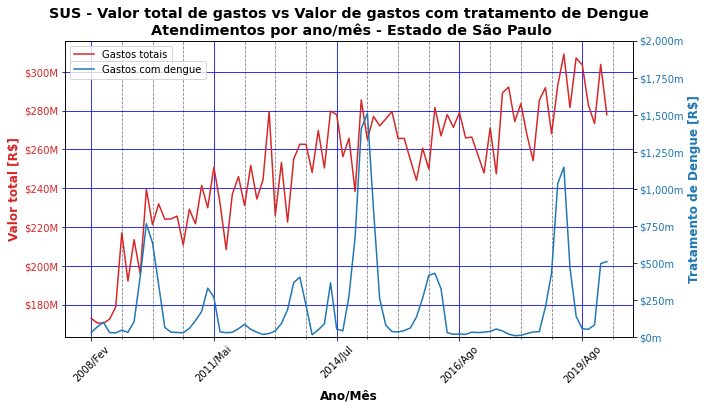

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

############################################################################
#Valor total de gastos com atendimentos por ano/mês por unidade da federação
############################################################################
dados = pd.read_csv("/content/A213524189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, 
                    thousands=".", decimal=",", engine='python')

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")

#retira coluna Total
usaveis = usaveis.drop("Total",axis=1)

#retira pico máximo para ajustar a escala
pico = usaveis.loc['35 São Paulo'].idxmax()
usaveis = usaveis.drop(pico,axis=1)

#total por Ano/mes
usaveis.loc["Total Ano/Mes"] = usaveis.sum(axis=0)

############################################################################
#Valor aprovado por Unidade da Federação e Ano/mês atendimento
#Procedimento Principal: 0303010010 TRATAMENTO DE DENGUE CLÁSSICA, 0303010029 TRATAMENTO DE DENGUE HEMORRÁGICA
#Período:Jan/2008-Mar/2021
############################################################################
dados_Dengue = pd.read_csv("/content/A091828189_28_143_208_Dengue.csv", encoding="ISO-8859-1", skiprows=4, sep=";", skipfooter=6, 
                    thousands=".", decimal=",", engine='python')

#slice - somente periodos que possuem correspodencia com os dados do total de gastos com atendimentos
usaveis_dengue = dados_Dengue[colunas_usaveis]

#somente colunas com dados para todas as unidades da federação
colunas_dengue_usaveis = usaveis_dengue.mean().index.tolist()
colunas_dengue_usaveis.insert(0, "Unidade da Federação")

#usaveis Dengue
usaveis_dengue = dados_Dengue[colunas_dengue_usaveis]
usaveis_dengue = usaveis_dengue.set_index("Unidade da Federação")

#retira coluna Total
usaveis_dengue = usaveis_dengue.drop("Total",axis=1)

#total por Ano/mes
usaveis_dengue.loc["Total dengue Ano/Mes"] = usaveis_dengue.sum(axis=0)

#########################################################################

#retira mês correspondente ao pico máximo para ajustar a escala
usaveis_dengue = usaveis_dengue.drop(pico,axis=1)

#somente periodos que possuem correspondencia com gastos de dengue
usaveis_compara = usaveis[usaveis_dengue.columns]

#Plots with different scales
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html

fig, ax1 = plt.subplots()

color = 'tab:red'#
ax1.set_xlabel('Ano/Mês',weight='bold',fontsize='large')
ax1.set_ylabel('Valor total [R$]', color=color, weight='bold',fontsize='large')
ax1.plot(usaveis_compara.T["35 São Paulo"], color=color, label="Gastos totais")
ax1.legend(loc="upper left", bbox_to_anchor=(0, 1))

#ticks e gridlines
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=45)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.grid(b=True, which='minor', color='grey', linestyle='--')
ax1.grid(b=True, which='major', color='grey', linestyle='-')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}M'.format(x/1000000)))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Tratamento de Dengue [R$]', color=color, weight='bold',fontsize='large')  # we already handled the x-label with ax1
ax2.plot(usaveis_dengue.T["35 São Paulo"], color=color, label="Gastos com dengue")
ax2.legend(loc="upper left", bbox_to_anchor=(0, 0.95))

#ticks e gridlines
ax2.tick_params(axis='y', labelcolor=color)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(5))

ax2.xaxis.set_visible(False)
ax2.set_ylim([0, 2000000])
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}m'.format(x/1000)))


fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_figheight(6)
fig.set_figwidth(12)

plt.title('SUS - Valor total de gastos vs Valor de gastos com tratamento de Dengue\n Atendimentos por ano/mês - Estado de São Paulo', weight='bold', fontsize='x-large' )
#plt.grid()
plt.show()

**A análise dos gastos do estado de São Paulo indica que os surtos de dengue refletem nos gastos totais conforme se observa a sincronia entre aumentos de tratamentos de dengue e dos gastos totais.**

**Vale ressaltar que os gastos totais apresentam picos que não estão relacionados ao aumento de tratamentos da dengue, o que indica a existência de outros fatores influenciando os gastos.**